In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['language'] == 'Faroese']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
260,4.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,sev,,"Heilsa, Trygd og Umhvørvi - SEV",https://www.sev.fo/roknskapur2019/heilsa-trygd...,"SEV leggur stóran dent á heilsu, trygd og umhv...",...,,,,,,,,,,
278,2.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,torshavn,Tórshavnar kommuna,Tórshavnar kommuna,https://www.torshavn.fo/bustadur-og-bygging/or...,Oljutangi – soleiðis gert tú Hevur tú ein gaml...,...,https://www.torshavn.fo/bustadur-og-bygging/or...,Oljutangi – soleiðis gert tú,Oljutangi – soleiðis gert tú Hevur tú ein gaml...,Oljutangi – soleiðis gert tú\nHevur tú ein gam...,,,,Orka Umhvørvi Oljutangi Oljufýring olja tangi ...,2020-07-10,Tórshavnar kommuna
279,15.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,gransking,,"Umhvørvi, veðurlag og orka - høgt raðfest í …",https://www.gransking.fo/fo/tilfeingi/tidindi/...,"Umhvørvi, veðurlag v.m. Sosial- og hugvísindi....",...,https://www.gransking.fo/fo/tilfeingi/tidindi/...,"Umhvørvi, veðurlag og orka - høgt raðfest í no...",Fríggjadagin 12. juni hittust norðurlendskir g...,"Umhvørvi, veðurlag og orka - høgt raðfest í no...",,,,,2009-06-15,Granskingarráðið
280,1.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,us,,Umhvørvisstovan - Forsíða,https://www.us.fo/,"Øll hava rottuskyldu. Sært tú tekin um rottu, ...",...,,Umhvørvisstovan,,Í dag er Dagur Móðir Jarðar. ST hevur brúkt da...,,,,,,Forsíða
281,19.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,articon,,"HEILSA, TRYGD OG UMHVØRVI - Articon",https://www.articon.fo/fo/soleidis-arbeida-vit...,"HEILSA, TRYGD OG UMHVØRVI. Starvsfólkini eru t...",...,https://www.articon.fo/fo/soleidis-arbeida-vit...,"HEILSA, TRYGD OG UMHVØRVI","HEILSA, TRYGD OG UMHVØRVI Starvsfólkini eru tý...",Starvsfólkini eru týdningarmesta tilfeingið hj...,,,,,,Articon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,202.0,bing,“Kolevnisslóð” OR “Kolevni” OR “CO2 útlát” OR ...,,Faroese,jenskjeld,,Upprunavøkstur í Føroyum / Oprindelig trævækst...,https://www.norden.org/en/news/jens-kjeld-jens...,Helst hvarv hassil úr Føroyum vegna veðurlagsb...,...,https://www.norden.org/en/news/jens-kjeld-jens...,Jens-Kjeld Jensen from the Faroe Islands wins ...,"Honorary doctor, writer, chef, and nature enth...",Jens-Kjeld Jensen from the Faroe Islands wins ...,,,,,2020-10-27,Nordic cooperation
511,26.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,uvmr,,Uppskot til kunngerð um óljóð frá skipum við …,https://www.uvmr.fo/fo/um-radid/stovnar/,Neyðug - Neyðug farspor hjálpa til við at gera...,...,https://www.uvmr.fo/fo/um-radid/stovnar/,Stovnar,,Henda heimasíðan brúkar farspor (cookies)\nVit...,,,,,,Umhvørvis- og vinnumálaráðið
520,26.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,uvmr,,Uppskot til kunngerð um óljóð frá skipum við …,https://www.uvmr.fo/fo/um-radid/stovnar/umhvor...,Neyðug - Neyðug farspor hjálpa til við at gera...,...,https://www.uvmr.fo/fo/um-radid/stovnar/umhvor...,Umhvørvisstovan,,Umhvørvisstovan er stovnur undir Heilsu- og in...,,,,,,Umhvørvis- og vinnumálaráðið
524,26.0,bing,(“umhvørvi” OR “umhvørvis*”) AND ((“burturkast...,,Faroese,uvmr,,Uppskot til kunngerð um óljóð frá skipum við …,https://www.uvmr.fo/fo/um-radid/nevndir-grunna...,Neyðug - Neyðug farspor hjálpa til við at gera...,...,https://www.uvmr.fo/fo/um-radid/nevndir-grunna...,"Nevndir, grunnar og ráð",,"Nevndir, grunnar og ráð undir Umhvørvis- og vi...",,,,,,Umhvørvis- og vinnumálaráðið


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['Manual actor name']:
        actor_id = row['Manual actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['language'] = row['language']
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,language
sev,sev,https://www.sev.fo/roknskapur2019/heilsa-trygd...,". Tá seinni heimsbardagi var av, var av álvar...",Faroese
Tórshavnar kommuna,Tórshavnar kommuna,https://www.torshavn.fo/bustadur-og-bygging/or...,Oljutangi – soleiðis gert tú\nHevur tú ein gam...,Faroese
gransking,gransking,https://www.gransking.fo/fo/tilfeingi/tidindi/...,"Umhvørvi, veðurlag og orka - høgt raðfest í no...",Faroese
us,us,https://www.us.fo/ https://www.us.fo/Default.a...,Í dag er Dagur Móðir Jarðar. ST hevur brúkt da...,Faroese
articon,articon,https://www.articon.fo/fo/soleidis-arbeida-vit...,Starvsfólkini eru týdningarmesta tilfeingið hj...,Faroese
...,...,...,...,...
Snældan,Snældan,https://snaldan.fo/pages/our-story,Our Story\nLocated by the fjord in the small t...,Faroese
konsult,konsult,https://fmareglur.konsult.fo/logtingslog-um-tr...,(seinast broytt við løgtingslóg nr. 85 frá 29....,Faroese
Ocean Rainforest,Ocean Rainforest,http://www.oceanrainforest.com/about-overview,About Ocean Rainforest\nWe are a young blue gr...,Faroese
Bakkafrost,Bakkafrost,https://www.bakkafrost.com/en/about-us/sustain...,We believe that by investing in the health of ...,Faroese


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# LOAD STOP WORDS
import csv
stopwords = []
with open('stopwords-en-dk-is.txt', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        word = row[0]
        stopwords.append(word)
print("Stop words loaded. Ex:", stopwords[0], stopwords[1], stopwords[2],"...")

Stop words loaded. Ex: i me my ...


In [9]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [10]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
1.2196722277952678   00
1.0651654709055531   published
1.0452385166122444   av
1.0180462000563424   nordisk
1.0086881105906047   um
1.0052985243720707   burturkast
1.0038822631411124   14
0.9564089540723215   fæst
0.9561215297677573   tín
0.954622104313071   kl
0.9429347813425707   16
0.9425308334144702   velja
0.9405655532892545   ini
0.9372286892737046   óljóð
0.9365244011677079   kommuna
0.9355086160959614   sín
0.9348259703006961   móti
0.9324316969222594   17
0.9321681078907882   fylgja
0.9296658617123139   aðrar
0.9290318037869868   23
0.9284187892565053   house
0.9255421199868717   lógini
0.9234374024096446   danish
0.921712009407019   stovnin
 
# TOPIC_1:
9.054954474034092   av
7.20306389566528   streymoy
5.738972071257321   faroe
5.719521634862884   faroese
5.533229114055774   islands
5.244355091895288   um
3.880287798151314   nordic
3.729697134623553   sum
3.65182895291356   fyri
3.4144911095333947   council
3.4000211118822454   gásadalur
3.3830900563208495   commo

1.7119544516578922   ið
1.6676935702515043   hetta
1.6249652270697144   atlantic
1.5448863315367243   environmental
1.525009541183931   skulu
1.4054034162614046   hava
1.385246199118514   ella
1.3832983386439528   management
1.3825522906275047   tú
1.37812077074629   eisini
1.3406979708291282   ein
1.282072478537324   seg
1.271879066047749   undir
1.2611373642943542   kann
 
# TOPIC_14:
3.6443680480730087   fyri
3.1861356376808057   um
3.158994779093189   av
3.0996949805336516   sum
2.620657131412567   hevur
2.479794264018816   tað
2.084339645134091   faroese
2.069971394162219   hava
1.9760723977891868   ein
1.9071594061533053   ið
1.638380790066278   eisini
1.6227347689537983   faroe
1.6082941671445377   tí
1.547067910005146   vit
1.5182130284842599   pdf
1.5143805508338428   eitt
1.5130643664644603   okkara
1.5079309940110452   føroyum
1.4685263820246197   hetta
1.4092598098917022   hon
1.4064681439733944   seg
1.3481634624690015   eina
1.3392636975507017   ikki
1.3332455904217053   

,topic,word,weight
0,TOPIC_0,00,1.219672
1,TOPIC_0,published,1.065165
2,TOPIC_0,av,1.045239
3,TOPIC_0,nordisk,1.018046
4,TOPIC_0,um,1.008688
...,...,...,...
370,TOPIC_14,seg,1.406468
371,TOPIC_14,eina,1.348163
372,TOPIC_14,ikki,1.339264
373,TOPIC_14,úr,1.333246


In [11]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [12]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,sev,0.000182,0.000182,0.000182,0.997457,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182
1,Tórshavnar kommuna,0.000091,0.000091,0.000091,0.998725,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
2,gransking,0.000139,0.000139,0.000139,0.998047,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139
3,us,0.000172,0.000172,0.000172,0.969366,0.000172,0.000172,0.028395,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172
4,articon,0.000388,0.000388,0.000388,0.994574,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388
5,fuglafjordur,0.000045,0.000045,0.000045,0.999369,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045
6,lms,0.000300,0.000300,0.000300,0.995796,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300
7,uvmr,0.000134,0.000134,0.000134,0.998126,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134,0.000134
8,framherji,0.000285,0.000285,0.000285,0.996011,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285,0.000285
9,fma,0.000196,0.000196,0.000196,0.678290,0.000196,0.000196,0.319168,0.000196,0.000196,0.000196,0.000196,0.000196,0.000196,0.000196,0.000196


In [13]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,sev,TOPIC_0,0.000182
1,sev,TOPIC_1,0.000182
2,sev,TOPIC_2,0.000182
3,sev,TOPIC_3,0.997457
4,sev,TOPIC_4,0.000182
...,...,...,...
835,Tora guides,TOPIC_10,0.066667
836,Tora guides,TOPIC_11,0.066667
837,Tora guides,TOPIC_12,0.066667
838,Tora guides,TOPIC_13,0.066667


In [14]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [15]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,language,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,sev,https://www.sev.fo/roknskapur2019/heilsa-trygd...,". Tá seinni heimsbardagi var av, var av álvar...",Faroese,0.000182,0.000182,0.000182,0.997457,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182,0.000182
1,Tórshavnar kommuna,https://www.torshavn.fo/bustadur-og-bygging/or...,Oljutangi – soleiðis gert tú\nHevur tú ein gam...,Faroese,0.000091,0.000091,0.000091,0.998725,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
2,gransking,https://www.gransking.fo/fo/tilfeingi/tidindi/...,"Umhvørvi, veðurlag og orka - høgt raðfest í no...",Faroese,0.000139,0.000139,0.000139,0.998047,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139,0.000139
3,us,https://www.us.fo/ https://www.us.fo/Default.a...,Í dag er Dagur Móðir Jarðar. ST hevur brúkt da...,Faroese,0.000172,0.000172,0.000172,0.969366,0.000172,0.000172,0.028395,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172
4,articon,https://www.articon.fo/fo/soleidis-arbeida-vit...,Starvsfólkini eru týdningarmesta tilfeingið hj...,Faroese,0.000388,0.000388,0.000388,0.994574,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Snældan,https://snaldan.fo/pages/our-story,Our Story\nLocated by the fjord in the small t...,Faroese,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.953333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
65,konsult,https://fmareglur.konsult.fo/logtingslog-um-tr...,(seinast broytt við løgtingslóg nr. 85 frá 29....,Faroese,0.000024,0.000024,0.000024,0.999658,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024
66,Ocean Rainforest,http://www.oceanrainforest.com/about-overview,About Ocean Rainforest\nWe are a young blue gr...,Faroese,0.000629,0.000629,0.000629,0.000629,0.000629,0.000629,0.118148,0.000629,0.000629,0.000629,0.000629,0.000629,0.873676,0.000629,0.000629
67,Bakkafrost,https://www.bakkafrost.com/en/about-us/sustain...,We believe that by investing in the health of ...,Faroese,0.000913,0.000913,0.000913,0.000913,0.000913,0.000913,0.166766,0.000913,0.000913,0.000913,0.000913,0.821362,0.000913,0.000913,0.000913


In [16]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [17]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [18]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [20]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [21]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [22]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(69, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

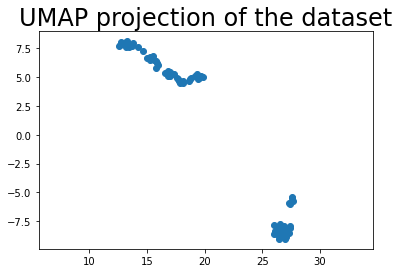

In [23]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [24]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')